In [1]:
import train
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


In [2]:
df = pd.read_csv(r"C:\Users\rohit\Desktop\machine learning\Datasets\NLM.csv")

In [3]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [4]:
df["label"].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [5]:
px.bar(df["label"].value_counts().index,df["label"].value_counts().values)

In [6]:
df = train.df
df.head()

,label,text
0,Psoriasis,experiencing skin rash arms legs torso p...
1,Psoriasis,skin peeling especially knees elbows scal...
2,Psoriasis,experiencing joint pain fingers wrists kn...
3,Psoriasis,silver like dusting skin especially lower...
4,Psoriasis,nails small dents pits often feel inflam...


In [7]:
x = df["text"]
y = df["label"]

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

# Logistic Regression 

In [10]:
lr = LogisticRegression(C=24,max_iter=150)

In [11]:
lr.fit(X_train,Y_train)

LogisticRegression(C=24, max_iter=150)

In [12]:
lr.score(X_test,Y_test)*100

97.66666666666667

Text(0.5, 23.52222222222222, 'Actual')

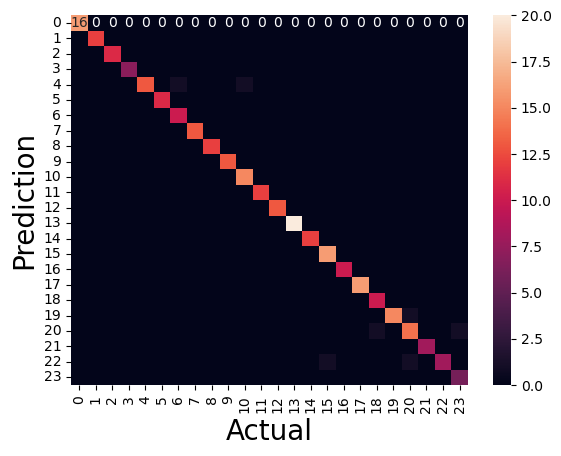

In [13]:
test =lr.predict(X_test)
cm = confusion_matrix(test,Y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Prediction",fontsize=20)
plt.xlabel("Actual",fontsize=20)

# Naive Bayes

In [14]:
mnb = MultinomialNB()

In [15]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [16]:
mnb.score(X_test,Y_test)*100

96.0

Text(0.5, 23.52222222222222, 'Actual')

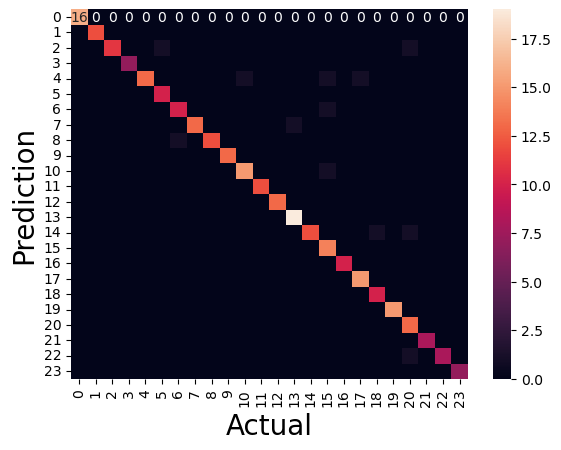

In [17]:
test =mnb.predict(X_test)
cm = confusion_matrix(test,Y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Prediction",fontsize=20)
plt.xlabel("Actual",fontsize=20)